# Evaluation of factors that influence the number of confirmed cases of COVID-19 from top 10 Economies.

#### Members: Ziqi Zhang, Weixiang Wang

#### This analysis is the final assignment for CMSC320, Introduction to Data Science, at the University of Maryland, College Park.

This project will take you through the some basic analysis of data science. In order to do so, we have chosen to investigate the relationship between factors including GDP per capita, Vaccination rate, population, and life expectance and the number of confirmed cases of COVID-19. COVID-19 is a contagious disease. There are many variants of COVID-19. For some of variants, the infectivity is very high. This disease has spread worldwide since 2020, and led to the ongoing pandemic. This pandemic has already affected billions of people’s lives. Before we have vaccinations, many countries were failed to control the spread of pandemic. Some countries, such as Italy conducted strictly shut down to stop the spreading. However, most of the countries can only slow the speed, but never stop the virus. The mortality and number of confirmed cases are increasing all the time. Some countries and areas were facing the medical system collapse. The confirmed rate among medical staff was also very high. For now, although we have different kinds of vaccines, its effectiveness is far lower than what we have expected. At the beginning, people hope that vaccines will protect people from infected. However, many cases have proved that vaccines can only reduce the probability of infection. Lots of people was infected by COVID-19 after fully vaccinated. Then people hope that the vaccine will reduce the probability of the development of the sever condition. People’s expectations towards vaccines have changed several times. This also means that we sill cannot see the end of pandemic. What is worse, many new variants of COVID-19 occur one after another. Vaccines seem to be much less effective to the new variants. Thus, we need to have some preparation in case that in the extreme condition, vaccines are completely useless. Based on this idea, we should know that what kinds of factors that may help to control the pandemic. If we can find influential factors, then it is possible for decision maker to design a plan besides promoting vaccination. We will focus on the analysis of which factors mentioned above are more correlated with the number of confirmed cases. Before we go into the analysis, we could infer that vaccination has great impact on the number of confirmed cases. However, through our analysis, we want to see whether there are other deciding factors that affect the number of confirmed cases. This is important because ending the pandemic as early as possible is the first priority for all the countries in the world. To many people died because of coronavirus. New variants occurs over and over. Vaccines on which people place great hope were proved to be less effective than what we have expected. This makes people feel more deperate. 

We will build a model that is able to predict the current number of cases with data input of the chosen factors. We will use the Random Forest Tree to see the importance of each factors. Based on the analysis of potential foctors that may have relations to the increasing number of confirmed cases, we may be able to have ideas of how to control the pandemic. For choosing which factors we should take into account, we first pick the vaccinated rate. Normally, we would consider that vaccinated rate would be the most important factor on the confirmed rate. We would like to add other factors and vaccinated rate to see whether it is true, and whether other factors have similar or even greater effects on the number of confirmed cases. The other factors we choose are GDP per capita, population, and life expectancy.

We will be using Python and tools such as Jupyter notebook to develop this project. The following is the libraries we will use in this project.

In [1]:
import os
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

from datetime import datetime
from bs4 import BeautifulSoup as bs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from scipy import spatial

In [2]:
plt.rcParams['figure.figsize'] = [12,8]

In [3]:
! pip install html5lib

In [4]:
! pip install lxml

# 1. Data Collection and Processing

The first step is to get necessary data. We fetch the data of countries from Wikipedia data. We found that the countries with a high rank in gdp have more sufficent data to analysis. They record the vaccination rate, number of confirmed cases regularly. Thus, for using enough data set to do the analysis and making sure the data is as reliable as possible, we decided to use the data of top 10 gdp countries in our project. 
If it is prompted "no lxml", you can create a new cell and run "! pip3 install lxml". 

## 1.1 Fetching GDP Data

We can fetch GDP data from Wiki page List_of_countries_by_GDP by using HTTP requrest.get(). BeautifulSoup is used to convert HTML rawdata to python parse tree. By using find_all('table'), we can locate the table of GDP. Then, we use pd.read_html() to read the table into a panda dataform.

In [5]:
gdp_request = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
gdp_root = bs(gdp_request.content,"lxml")
gdp = pd.read_html(gdp_root.find_all('table')[2].prettify())[0]
gdp = gdp.droplevel(0, axis=1)
gdp

,Country/Territory,Region,Estimate,Year,Estimate,Year,Estimate,Year
0,United States,Americas,22675271.0,2021,21433226,2019,20936600.0,2020
1,China,Asia,16642318.0,[n 2] 2021,14342933,[n 3] 2019,14722731.0,2020
2,Japan,Asia,5378136.0,2021,5082465,2019,4975415.0,2020
3,Germany,Europe,4319286.0,2021,3861123,2019,3806060.0,2020
4,United Kingdom,Europe,3124650.0,2021,2826441,2019,2707744.0,2020
...,...,...,...,...,...,...,...,...
208,Marshall Islands,Oceania,234.0,2021,237,2019,239.0,2019
209,Kiribati,Oceania,231.0,2021,194,2019,200.0,2020
210,Nauru,Oceania,133.0,2021,132,2019,118.0,2019
211,Montserrat,Americas,NaN,NaN,67,2019,NaN,NaN


Fetch the data of top 10 gdp countries from the gdp dataframe aove.

In [6]:
top_10_gdp = gdp[0:10][["Country/Territory"]]
top_10_gdp = top_10_gdp.rename(columns={"Country/Territory": "Country/Region"})
top_10_gdp

,Country/Region
0,United States
1,China
2,Japan
3,Germany
4,United Kingdom
5,India
6,France
7,Italy
8,Canada
9,South Korea


## 1.2 Fetching Population Data

Use HTTP request and BeautifulSoup to fetch population data from Wiki

In [7]:
#If it is prompted "no lxml", you can create a new cell and run "! pip3 install lxml".
pop_dropped_col = ["Rank","Region","% of world","Date","Source (official or from the  United Nations  )","Notes"]
pop_request = requests.get('https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population')
pop_root = bs(pop_request.content,"lxml")
pop = pd.read_html(pop_root.find('table').prettify())[0]
pop 

,Rank,Country or dependent territory,Region,Population,% of world,Date,Source (official or from the United Nations ),Notes
0,–,NaN,World,7917415000,NaN,20 Dec 2021,UN projection [2],NaN
1,1,China,Asia,1411778724,NaN,1 Nov 2020,2020 census result [3],"The census figure refers to mainland China ,..."
2,2,India,Asia,1385779401,NaN,20 Dec 2021,National population clock [4],The figure includes the population of India-ad...
3,3,United States,Americas,332909497,NaN,20 Dec 2021,National population clock [5],Includes the 50 states and the District of ...
4,4,Indonesia,Asia,271350000,NaN,31 Dec 2020,National annual estimate [6],NaN
...,...,...,...,...,...,...,...,...
237,–,Niue (New Zealand),Oceania,1549,NaN,1 Jul 2021,National annual projection [91],NaN
238,–,Tokelau (New Zealand),Oceania,1501,NaN,1 Jul 2021,National annual projection [91],NaN
239,195,Vatican City,Europe,825,NaN,1 Feb 2019,Monthly national estimate [190],The total population of 825 consisted of 453 r...
240,–,Cocos (Keeling) Islands (Australia),Oceania,573,NaN,30 Jun 2020,National annual estimate [189],NaN


Since we only want population data of countries with top 10 GDP, we drop the irrelevant columns and merge the dataframe with the gdp dataframe.

In [8]:
pop = pop.rename(columns={"Country or dependent territory": "Country/Region"})
pop = pop.drop(columns=pop_dropped_col,errors="ignore")
pop = pop[1:]
pop["Population"] = pop["Population"].astype(float)
pop

#Get the population top 10 gdp countries
pop_gdp = top_10_gdp.merge(pop,how="inner") 
pop_gdp

,Country/Region,Population
0,United States,3.329095e+08
1,China,1.411779e+09
2,Japan,1.250700e+08
3,Germany,8.312928e+07
4,United Kingdom,6.708123e+07
5,India,1.385779e+09
6,France,6.750500e+07
7,Italy,5.909790e+07
8,Canada,3.851665e+07
9,South Korea,5.167157e+07


Plot the population data with plt.

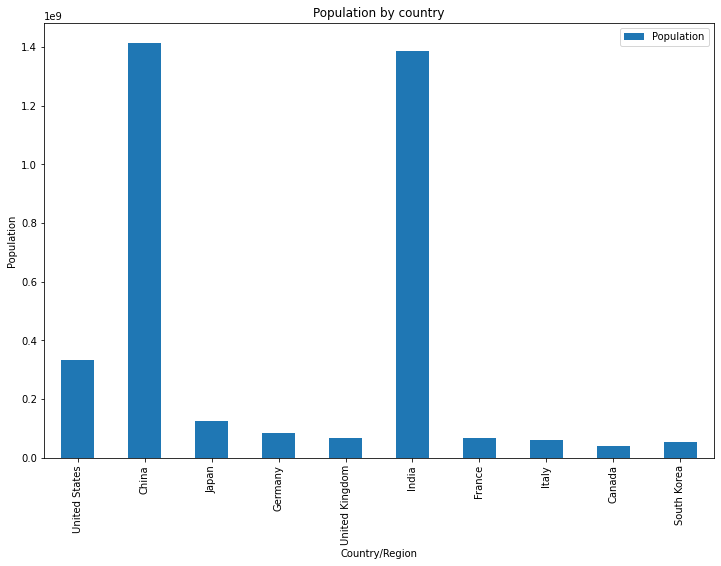

In [9]:
pop_gdp.plot.bar(x="Country/Region",y="Population")
plt.title('Population by country')
plt.xlabel('Country/Region')
plt.ylabel('Population')
plt.show()

## 1.3 Fetching Confirmed Case Data

Fetch Covid-19 confirmed case data from JHU Covid-19 dataset

In [10]:
us_df = pd.read_csv("time_series_covid19_confirmed_US.csv")
us_df

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,10566,10575,10584,10589,10596,10599,10605,10637,10641,10646
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,38236,38247,38265,38278,38307,38314,38321,38398,38413,38441
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,3708,3712,3714,3714,3716,3716,3716,3718,3719,3720
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,4367,4371,4375,4378,4379,4379,4379,4385,4388,4391
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,10803,10817,10828,10840,10857,10860,10864,10878,10904,10919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3337,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,5425,5433,5436,5437,5437,5437,5446,5458,5460,5467
3338,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,4076,4080,4084,4091,4091,4091,4094,4101,4110,4110
3339,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3340,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,1858,1858,1860,1863,1863,1863,1853,1853,1855,1856


Drop the irrelevant columns. Since the each row in the data represent the province or state data, we can use groupby() and sum() to sum up state data and get the total confirmed case data for the United States.

In [11]:
#Get the number of confirmed cases in the US.
us_dropped_col = ["UID","iso2","iso3","code3","FIPS","Admin2","Province_State","Lat","Long_","Combined_Key"]
us_df = us_df.rename(columns={"Country_Region": "Country/Region"})
us_df = us_df.replace("US","United States")
us_df = us_df.drop(columns=us_dropped_col,errors="ignore")
us_df = us_df.groupby(by="Country/Region", as_index=False).sum()
us_df = us_df.fillna(0)#
us_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21
0,United States,1,1,2,2,5,5,5,6,6,...,49394125,49543526,49661477,49833771,49884847,49921799,50119589,50233338,50374543,50513428


Read data from JHU dataset. we can use groupby() and sum() to sum up state data and get the total confirmed case data for the each country.

In [12]:
## Concatenate data
dropped_col = ["Province/State","Lat","Long"]
df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df = df.replace("Korea, South","South Korea")
df = df.drop(columns=dropped_col,errors="ignore") 
df = df.groupby(by="Country/Region", as_index=False).sum()
df = df.merge(top_10_gdp,how="right")
df = df.fillna(0)
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21
0,United States,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,China,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.0,8141.0,...,111919.0,112002.0,112072.0,112163.0,112239.0,112345.0,112423.0,112497.0,112573.0,112659.0
2,Japan,2.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,11.0,...,1727382.0,1727504.0,1727658.0,1727794.0,1727925.0,1728023.0,1728090.0,1728218.0,1728377.0,1728540.0
3,Germany,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,...,6312346.0,6339828.0,6442846.0,6496142.0,6528894.0,6546010.0,6581433.0,6633666.0,6690568.0,6741968.0
4,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10620535.0,10671538.0,10722083.0,10780610.0,10833033.0,10881189.0,10935244.0,10995311.0,11073455.0,11161497.0
5,India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,34656822.0,34666241.0,34674643.0,34682633.0,34690510.0,34697860.0,34703644.0,34710628.0,34718602.0,34726049.0
6,France,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,...,8091667.0,8153025.0,8209911.0,8265076.0,8318995.0,8362843.0,8374944.0,8438360.0,8504074.0,8564979.0
7,Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5134318.0,5152264.0,5164780.0,5185270.0,5206305.0,5225517.0,5238221.0,5258886.0,5282076.0,5308180.0
8,Canada,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,...,1823674.0,1827339.0,1831341.0,1834569.0,1839770.0,1841672.0,1849762.0,1854234.0,1860210.0,1867545.0
9,South Korea,1.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,...,489484.0,496584.0,503606.0,510583.0,517271.0,523088.0,528652.0,536495.0,544117.0,551551.0


Merge the data from US with the data from other countries.

In [13]:
df.loc[0] = us_df.loc[0]
#df[df.columns[1:]] = df[df.columns[1:]].div(pop_gdp["Population"], axis=0)
df.to_csv('covid_data.csv',index=False)
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21
0,United States,1.0,1.0,2.0,2.0,5.0,5.0,5.0,6.0,6.0,...,49394125.0,49543526.0,49661477.0,49833771.0,49884847.0,49921799.0,50119589.0,50233338.0,50374543.0,50513428.0
1,China,548.0,643.0,920.0,1406.0,2075.0,2877.0,5509.0,6087.0,8141.0,...,111919.0,112002.0,112072.0,112163.0,112239.0,112345.0,112423.0,112497.0,112573.0,112659.0
2,Japan,2.0,2.0,2.0,2.0,4.0,4.0,7.0,7.0,11.0,...,1727382.0,1727504.0,1727658.0,1727794.0,1727925.0,1728023.0,1728090.0,1728218.0,1728377.0,1728540.0
3,Germany,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,...,6312346.0,6339828.0,6442846.0,6496142.0,6528894.0,6546010.0,6581433.0,6633666.0,6690568.0,6741968.0
4,United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10620535.0,10671538.0,10722083.0,10780610.0,10833033.0,10881189.0,10935244.0,10995311.0,11073455.0,11161497.0
5,India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,34656822.0,34666241.0,34674643.0,34682633.0,34690510.0,34697860.0,34703644.0,34710628.0,34718602.0,34726049.0
6,France,0.0,0.0,2.0,3.0,3.0,3.0,4.0,5.0,5.0,...,8091667.0,8153025.0,8209911.0,8265076.0,8318995.0,8362843.0,8374944.0,8438360.0,8504074.0,8564979.0
7,Italy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5134318.0,5152264.0,5164780.0,5185270.0,5206305.0,5225517.0,5238221.0,5258886.0,5282076.0,5308180.0
8,Canada,0.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,...,1823674.0,1827339.0,1831341.0,1834569.0,1839770.0,1841672.0,1849762.0,1854234.0,1860210.0,1867545.0
9,South Korea,1.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,...,489484.0,496584.0,503606.0,510583.0,517271.0,523088.0,528652.0,536495.0,544117.0,551551.0


Add date as a column in the table.

In [14]:
df = pd.read_csv("covid_data.csv")
df = df.set_index("Country/Region")
#df["Country/Region"] = pd.to_datetime(df["Country/Region"])
df = df.T
df = df.reset_index()
df = df.rename(columns={"index":"Date"})
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")
df

Country/Region,United States,China,Japan,Germany,United Kingdom,India,France,Italy,Canada,South Korea
Date,,,,,,,,,,
2020-01-22,1.0,548.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-23,1.0,643.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-01-24,2.0,920.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
2020-01-25,2.0,1406.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0
2020-01-26,5.0,2075.0,4.0,0.0,0.0,0.0,3.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-12,49921799.0,112345.0,1728023.0,6546010.0,10881189.0,34697860.0,8362843.0,5225517.0,1841672.0,523088.0
2021-12-13,50119589.0,112423.0,1728090.0,6581433.0,10935244.0,34703644.0,8374944.0,5238221.0,1849762.0,528652.0
2021-12-14,50233338.0,112497.0,1728218.0,6633666.0,10995311.0,34710628.0,8438360.0,5258886.0,1854234.0,536495.0


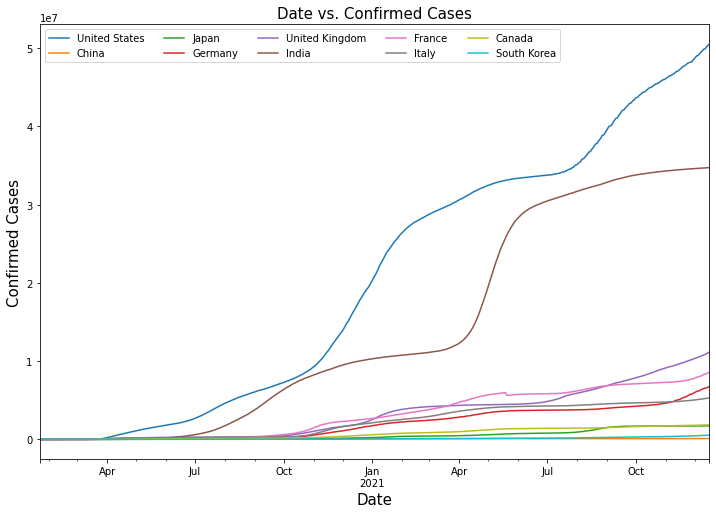

In [15]:
#Number of confirmed cases.
df.plot()

plt.xlabel('Date', size = 15)
plt.ylabel('Confirmed Cases', size = 15)
plt.title('Date vs. Confirmed Cases',size = 15)
plt.legend(loc='best',ncol = 5, fontsize = 10)
plt.show()

## 1.4 Fetching Vaccination Data

Fetch Covid-19 Vaccination data from JHU Covid-19 dataset. Get the number of fully vaccinated people in top 10 GDP countries.

In [16]:
## Concatenate data
vac_dropped_col = ["Doses_admin","People_partially_vaccinated","UID"]
vac_df = pd.read_csv("time_series_covid19_vaccine_global.csv")
vac_df = vac_df.rename(columns={"Country_Region": "Country/Region"})
vac_df = vac_df.replace("Korea, South","South Korea")
vac_df = vac_df.drop(columns=vac_dropped_col,errors="ignore")
vac_df = vac_df.groupby(by=["Date","Country/Region"], as_index=False).sum()
vac_df 

,Date,Country/Region,People_fully_vaccinated
0,2020-12-14,Canada,0.000000e+00
1,2020-12-14,World,0.000000e+00
2,2020-12-15,Canada,0.000000e+00
3,2020-12-15,China,0.000000e+00
4,2020-12-15,Russia,0.000000e+00
...,...,...,...
51716,2021-12-17,West Bank and Gaza,0.000000e+00
51717,2021-12-17,World,3.622553e+09
51718,2021-12-17,Yemen,3.665870e+05
51719,2021-12-17,Zambia,9.042010e+05


Get the number of fully vaccinated people in top 10 GDP countries. Drop the irrelevant columns. Since the each row in the data represent the province or state data, we can use groupby() and sum() to sum up state data and get the total fully vaccination data for the each country.

In [17]:
#Korea does not provide the vaccination data, thus removing the Korea column.
vac_df = top_10_gdp.merge(vac_df,how="inner") 
vac_df_pivot = vac_df.pivot(index='Date', columns="Country/Region", values="People_fully_vaccinated")
vac_df_pivot = vac_df_pivot.fillna(0.0)
vac_df_pivot.drop(columns=["South Korea"])
vac_df_pivot = vac_df_pivot[["China","Japan","Germany","United Kingdom","India","France","Italy","Canada"]]
vac_df_pivot 

Country/Region,China,Japan,Germany,United Kingdom,India,France,Italy,Canada
Date,,,,,,,,
2020-12-14,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-15,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-16,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-17,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-18,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2021-12-13,1.162488e+09,98105016.0,57939197.0,46775202.0,517558003.0,48052807.0,44293381.0,29217141.0
2021-12-14,1.162488e+09,98157944.0,57939197.0,46804609.0,525327515.0,48145448.0,44343143.0,29229046.0
2021-12-15,1.162488e+09,98190145.0,58171445.0,46842497.0,529939705.0,48264668.0,44343143.0,29244693.0


Get the daily number of fully vaccinated people in the US.

In [18]:
## Concatenate data
us_vac_dropped_col = ["FIPS","Province_State","Lat","Long_","Combined_Key", "People_Partially_Vaccinated"]
us_vac_df = pd.read_csv("people_vaccinated_us_timeline.csv")
us_vac_df = us_vac_df.rename(columns={"Country_Region": "Country/Region"})
us_vac_df = us_vac_df.replace("US","United States")
us_vac_df = us_vac_df.drop(columns=us_vac_dropped_col,errors="ignore") 
us_vac_df = us_vac_df.groupby(by=["Date","Country/Region"], as_index=False).sum()
us_vac_df = us_vac_df[["People_Fully_Vaccinated"]][4:]
us_vac_df

,People_Fully_Vaccinated
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
...,...
368,208895848.0
369,209192751.0
370,209507778.0
371,209700991.0


Merge the data from the US and the data from other countries. Remove Korea since it does not provide any vaccination data.

In [19]:
vac_pop_gdp = pop_gdp.drop(labels=9, axis=0)
vac_df_pivot.insert(0,"United States",value = us_vac_df)
vac_df_pivot = vac_df_pivot.reset_index()
vac_df_pivot['Date'] = pd.to_datetime(vac_df_pivot['Date'])
vac_df_pivot = vac_df_pivot.set_index("Date")
vac_df_pivot

Country/Region,United States,China,Japan,Germany,United Kingdom,India,France,Italy,Canada
Date,,,,,,,,,
2020-12-14,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-15,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-16,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-17,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-18,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2021-12-13,208895848.0,1.162488e+09,98105016.0,57939197.0,46775202.0,517558003.0,48052807.0,44293381.0,29217141.0
2021-12-14,209192751.0,1.162488e+09,98157944.0,57939197.0,46804609.0,525327515.0,48145448.0,44343143.0,29229046.0
2021-12-15,209507778.0,1.162488e+09,98190145.0,58171445.0,46842497.0,529939705.0,48264668.0,44343143.0,29244693.0


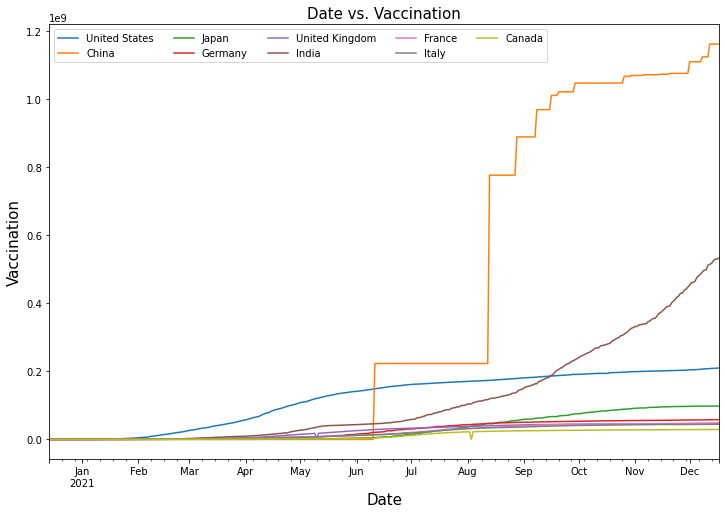

In [20]:
#Number of fully vaccinated people.
vac_df_pivot.plot()

plt.xlabel('Date', size = 15)
plt.ylabel('Vaccination', size = 15)
plt.title('Date vs. Vaccination',size = 15)
plt.legend(loc='best',ncol = 5, fontsize = 10)
plt.show()

According to the table, we found that there are lots of missing data from China. Thus, we remove the
the China column. Remove the dates that the data is missing.

In [21]:
fixed_vac_df_pivot = vac_df_pivot.drop(columns=["China"])
fixed_vac_df_pivot = fixed_vac_df_pivot.replace(0.0,np.NaN)
fixed_vac_df_pivot = fixed_vac_df_pivot.dropna()
fixed_vac_df_pivot

Country/Region,United States,Japan,Germany,United Kingdom,India,France,Italy,Canada
Date,,,,,,,,
2021-03-10,34074653.0,35.0,2735387.0,1351515.0,4650530.0,2103565.0,1830465.0,583483.0
2021-03-11,34951809.0,443.0,2796299.0,1445078.0,4729079.0,2166683.0,1889580.0,587651.0
2021-03-12,36015724.0,3348.0,2867887.0,1532754.0,5142953.0,2220189.0,1950359.0,590674.0
2021-03-13,37078373.0,3348.0,2917341.0,1584909.0,5430774.0,2235473.0,1998650.0,593331.0
2021-03-14,39234715.0,3348.0,2953338.0,1610280.0,5455653.0,2238910.0,2031804.0,595333.0
...,...,...,...,...,...,...,...,...
2021-12-13,208895848.0,98105016.0,57939197.0,46775202.0,517558003.0,48052807.0,44293381.0,29217141.0
2021-12-14,209192751.0,98157944.0,57939197.0,46804609.0,525327515.0,48145448.0,44343143.0,29229046.0
2021-12-15,209507778.0,98190145.0,58171445.0,46842497.0,529939705.0,48264668.0,44343143.0,29244693.0


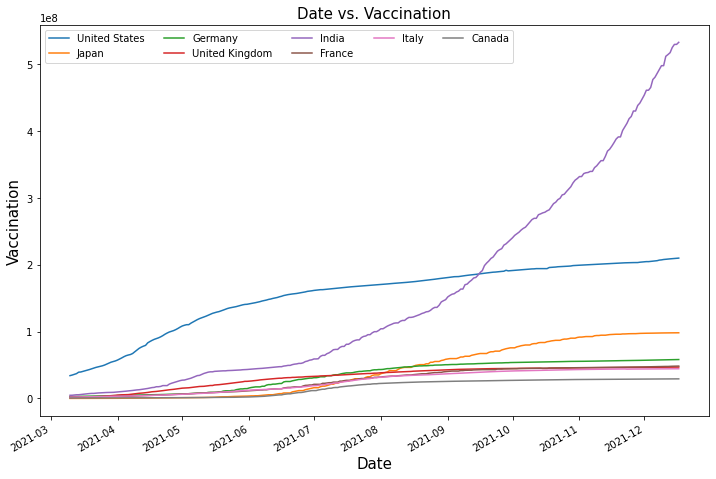

In [22]:
fixed_vac_df_pivot.plot()

plt.xlabel('Date', size = 15)
plt.ylabel('Vaccination', size = 15)
plt.title('Date vs. Vaccination',size = 15)
plt.legend(loc='best',ncol = 5, fontsize = 10)
plt.show()

## 1.5 Fetching Life Expectancy Data

Use HTTP request and BeautifulSoup to fetch life expectancy data from Wiki. Repeat steps above to
get the life expectancy data for the chosen countries.

In [23]:
lf_request = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy')
lf_root = bs(lf_request.content,"lxml")
lf = pd.read_html(lf_root.find_all('table')[0].prettify())[0]
lf = lf.droplevel(0, axis=1)[1:]
lf

,Country,All,M,F,Δ from 2000,Gender life gap,All,M,F,Δ from 2000,Gender life gap,All,M,F,Gender life gap,All,M,F,Gender life gap
1,Japan,84.67,81.64,87.74,3.59,6.1,26.73,23.9,28.6,2.2,4.7,74.1,72.6,75.5,2.9,20.4,18.8,21.8,3.0
2,Switzerland,83.92,82.04,85.72,4.24,3.3,25.40,24.1,26.6,2.4,2.5,72.5,72.2,72.8,0.6,19.5,18.8,20.2,1.4
3,South Korea,83.06,80.50,86.50,7.15,6.0,25.80,23.4,27.9,5.1,4.5,73.1,71.3,74.7,3.4,19.8,18.2,21.2,3.0
4,Singapore,83.20,81.00,85.50,4.80,4.5,25.50,23.8,27.2,4.0,3.4,73.6,72.4,74.7,2.3,20.0,18.8,21.0,2.2
5,Spain,83.20,80.70,85.70,4.10,5.0,25.40,23.3,27.3,2.7,4.0,72.1,71.3,72.9,1.6,19.2,18.0,20.3,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,Mozambique,58.10,54.50,61.70,7.40,7.2,15.80,13.3,17.8,0.6,4.5,50.4,47.9,52.8,4.9,11.6,9.8,13.0,3.2
187,Eswatini,57.70,53.40,63.20,10.70,9.8,15.10,12.4,17.7,1.5,5.3,50.1,47.1,53.8,6.7,11.0,9.0,12.9,3.9
188,Somalia,56.50,54.00,59.20,6.60,5.2,14.50,13.2,16.0,1.4,2.8,49.7,48.3,51.3,3.0,11.2,10.3,12.2,1.9
189,Central African Republic,53.10,50.20,56.30,8.80,6.1,13.20,11.3,14.9,1.4,3.6,46.4,44.5,48.4,3.9,10.0,8.6,11.1,2.5


In [24]:
#Generate the list of contries with vaccination data.
country_df = pd.DataFrame(["United States","Japan","Germany","United Kingdom","India","France","Italy","Canada"])
country_df.columns = ["Country/Region"]
country_df

,Country/Region
0,United States
1,Japan
2,Germany
3,United Kingdom
4,India
5,France
6,Italy
7,Canada


In [25]:
## Concatenate data
#Get the life expectancy data for these countries.
lf = lf.rename(columns={"Country": "Country/Region"})
lf = lf.rename(columns={"All": "life_Expectancy"})
lf = lf[["Country/Region","life_Expectancy"]]
lf = lf.iloc[: , :2]
lf_df = country_df.merge(lf,how="inner") 
lf_df

,Country/Region,life_Expectancy
0,United States,78.40
1,Japan,84.67
2,Germany,81.70
3,United Kingdom,81.40
4,India,70.80
5,France,82.50
6,Italy,83.00
7,Canada,82.20


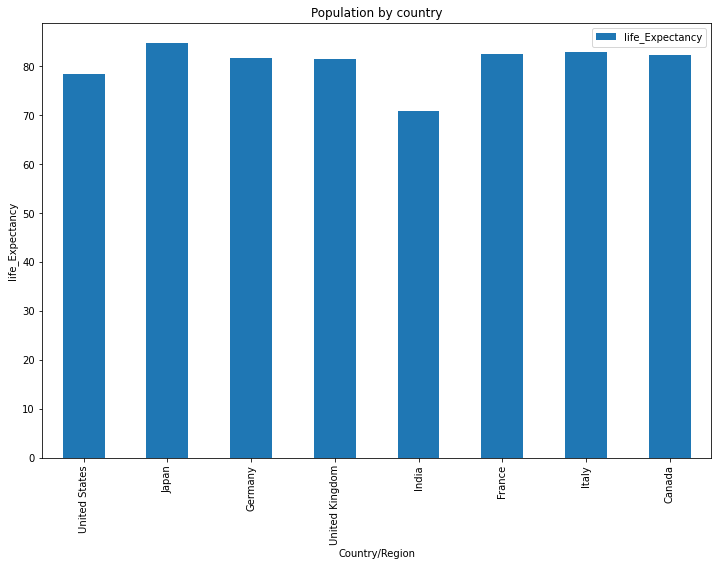

In [26]:
lf_df.plot.bar(x="Country/Region",y="life_Expectancy")
plt.title('Population by country')
plt.xlabel('Country/Region')
plt.ylabel('life_Expectancy')
plt.show()

## 1.6 Fetching GDP Per Capita Data

Get the data of GDP per capita for the chosen countries. Use HTTP request and BeautifulSoup to fetch GDP Per Capita data from Wiki. Repeat steps above.

In [27]:
#If it is prompted "no lxml", you can create a new cell and run "! pip3 install lxml".
gdpc_request = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita')
gdpc_root = bs(gdpc_request.content,"lxml")
gdpc = pd.read_html(gdpc_root.find_all('table')[1].prettify())[0]
gdpc = gdpc.droplevel(0, axis=1)[1:]
gdpc

,Country/Territory,Subregion,Region,Estimate,Year,Estimate,Year,Estimate,Year
1,Liechtenstein *,Western Europe,Europe,NaN,NaN,179258.0,2019,180367.0,2018.0
2,Luxembourg *,Western Europe,Europe,131782,2021.0,115481.0,2019,115874.0,2020.0
3,Bermuda *,Northern America,Americas,NaN,NaN,117768.0,2019,117098.0,2019.0
4,Switzerland *,Western Europe,Europe,94696,2021.0,85135.0,2019,86602.0,2020.0
5,Ireland *,Northern Europe,Europe,94556,2021.0,81637.0,2019,83813.0,2020.0
...,...,...,...,...,...,...,...,...,...
211,Malawi *,Eastern Africa,Africa,432,2021.0,435.0,2019,625.0,2020.0
212,Mozambique *,Eastern Africa,Africa,425,2021.0,504.0,2019,449.0,2020.0
213,Somalia *,Eastern Africa,Africa,347,2021.0,105.0,2019,309.0,2020.0
214,South Sudan *,Eastern Africa,Africa,315,2021.0,448.0,2019,1120.0,2015.0


In [28]:
## Concatenate data
#Get the GDP per capita for the corresponding countries.
gdpc = gdpc.rename(columns={"Country/Territory": "Country/Region"})
gdpc = gdpc[["Country/Region","Estimate"]]
gdpc["Country/Region"] = gdpc["Country/Region"].str.slice(stop=-2)
gdpc = gdpc.iloc[: , :2]
gdpc_df = country_df.merge(gdpc,how="inner") 
gdpc_df

,Country/Region,Estimate
0,United States,68309
1,Japan,42928
2,Germany,51860
3,United Kingdom,46344
4,India,"2,116 [10]"
5,France,44995
6,Italy,34997
7,Canada,49222


Fix the data of Indian GDP per capita by using iloc to locate the GDP data of india. Delete the ciation in the cell.

In [29]:
gdpc_df["Estimate"].iloc[4] = 2116
gdpc_df["Estimate"] = gdpc_df["Estimate"].astype(float)
gdpc_df = gdpc_df.rename(columns={"Estimate":"GDP_Per_Capita"})
gdpc_df

,Country/Region,GDP_Per_Capita
0,United States,68309.0
1,Japan,42928.0
2,Germany,51860.0
3,United Kingdom,46344.0
4,India,2116.0
5,France,44995.0
6,Italy,34997.0
7,Canada,49222.0


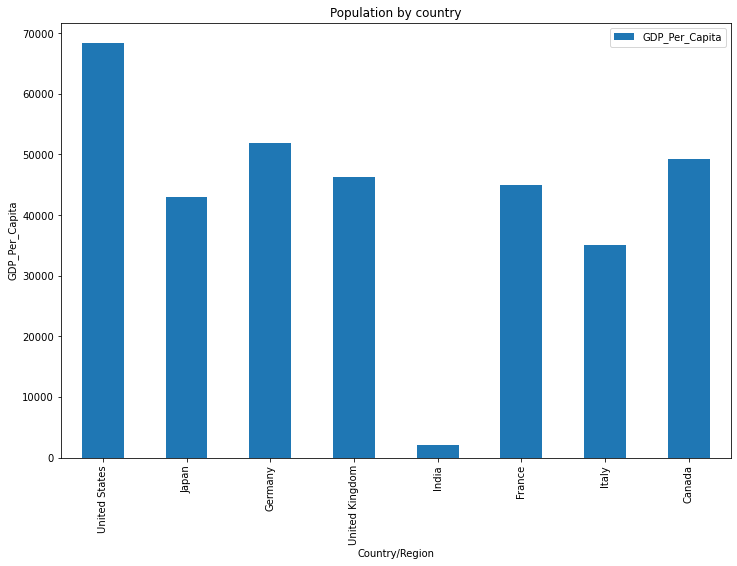

In [30]:
gdpc_df.plot.bar(x="Country/Region",y="GDP_Per_Capita")
plt.title('Population by country')
plt.xlabel('Country/Region')
plt.ylabel('GDP_Per_Capita')
plt.show()

## 1.7 Data Merging

Melt data of vaccination table in order to merge the tables.

In [31]:
vac_df_list = fixed_vac_df_pivot.reset_index()
vac_df_list = vac_df_list.melt(id_vars=['Date'], 
                        value_vars=["United States","Japan","Germany","United Kingdom","India","France",
                                    "Italy","Canada"])
vac_df_list = vac_df_list.rename(columns={"value":"Vaccination"})

Merge the data of different factors into one table. Since there is no data for some dates in the vaccination table, we drop rows containing these dates by merge the column of date of the vaccination table with the confirmed case table. Thus, we obtain a confirmed case table with the same number of columns as the vaccination table.

In [32]:
date = fixed_vac_df_pivot.reset_index()['Date']
total_df = df.merge(date,on="Date",how="inner") 
total_df = total_df.drop(columns=["China","South Korea"])
total_df = total_df.melt(id_vars=['Date'], 
                         value_vars=["United States","Japan","Germany","United Kingdom","India","France",
                                     "Italy","Canada"])
total_df = total_df.rename(columns={"variable":"Country/Region", "value":"Confirmed_Cases"})

# Merge the vaccination table
total_df = vac_df_list.merge(total_df,on=["Date","Country/Region"],how="inner") 

# Merge the GDP per capita table
total_df = gdpc_df.merge(total_df,on=["Country/Region"],how="inner") 

# Merge the left expectancy table
total_df = lf_df.merge(total_df,on=["Country/Region"],how="inner")

# Merge the population table
total_df = pop_gdp.merge(total_df,on=["Country/Region"],how="inner")

# Calculate how many day passed
total_df['day'] = total_df['Date'] - datetime.strptime("2021-03-10","%Y-%m-%d") 
total_df['day'] = pd.to_numeric(total_df['day'].dt.days, downcast='integer')

total_df = total_df[["Date","Country/Region","life_Expectancy","GDP_Per_Capita",
                     "Vaccination","Population","day","Confirmed_Cases"]]
total_df

,Date,Country/Region,life_Expectancy,GDP_Per_Capita,Vaccination,Population,day,Confirmed_Cases
0,2021-03-10,United States,78.4,68309.0,34074653.0,332909497.0,0,29292577.0
1,2021-03-11,United States,78.4,68309.0,34951809.0,332909497.0,1,29355473.0
2,2021-03-12,United States,78.4,68309.0,36015724.0,332909497.0,2,29417546.0
3,2021-03-13,United States,78.4,68309.0,37078373.0,332909497.0,3,29471138.0
4,2021-03-14,United States,78.4,68309.0,39234715.0,332909497.0,4,29509990.0
...,...,...,...,...,...,...,...,...
2235,2021-12-12,Canada,82.2,49222.0,29197922.0,38516648.0,277,1841672.0
2236,2021-12-13,Canada,82.2,49222.0,29217141.0,38516648.0,278,1849762.0
2237,2021-12-14,Canada,82.2,49222.0,29229046.0,38516648.0,279,1854234.0
2238,2021-12-15,Canada,82.2,49222.0,29244693.0,38516648.0,280,1860210.0


# 2. Data Analysis 

Create linear regression model.
Prob (F-statistic) is very close to 0, which means that the degree of fitting is high.

In [33]:
reg_formula = "Confirmed_Cases ~ day + Vaccination + GDP_Per_Capita + Population + life_Expectancy"
reg = smf.ols(formula=reg_formula, data=total_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Confirmed_Cases   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     3251.
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:47:35   Log-Likelihood:                -37585.
No. Observations:                2240   AIC:                         7.518e+04
Df Residuals:                    2234   BIC:                         7.522e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        8.828e+07   8.47e+06     10.429      0.000    7.17e+07    1.05e+08
day              3497.6295   1558.184      2.245      0.025     441.989    6553.270
Vaccination         0.0526      0.002     24.488      0.000       0.048       0.057
GDP_Per_Capita    537.5625     12.190     44.099      0.000     513.658     561.467
Population          0.0191      0.001     15.769      0.000       0.017       0.022
life_Expectancy  -1.35e+06   9.77e+04    -13.814      0.000   -1.54e+06   -1.16e+06
==============================================================================
Omnibus:                       41.624   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.273
Skew:                           0.119   Prob(JB):                     1.97e-06
Kurtosis:                       2.525   Cond. No.                     4.38e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
#Obtain data and labels
data = total_df.values[:, 2:-1]
labels = total_df.values[:, -1].astype(int)

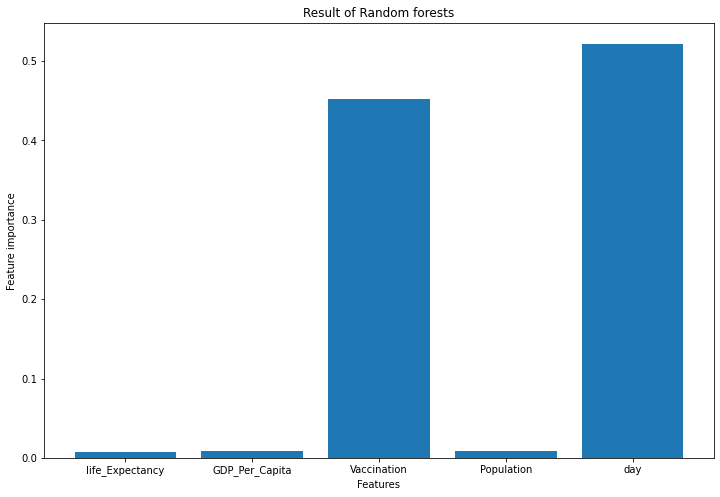

In [35]:
model = RandomForestClassifier(n_estimators=10)
model = model.fit(data, labels)

plt.bar(x=total_df.columns[2:-1], height=model.feature_importances_)
plt.title('Result of Random forests')
plt.ylabel('Feature importance')
plt.xlabel('Features')
plt.show()

Use train_test_split to split our data into training data and test data

In [36]:
training_data, test_data, training_labels, test_labels = \
    train_test_split(data, labels, test_size = 0.25)

Random Forests are an ensemble learning method for classification.

Random Forests can be used to rank the importance of the variables in a regression or classifiation problem.

We use Random Forests to rank the factors that have effects on the number of confirmed cases.

In [37]:
# Using Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=10)
rf_model = rf_model.fit(training_data, training_labels)

In [38]:
# Random Forest Classifier Predict
rf_predict = rf_model.predict(test_data)
rf_mean_error = abs(rf_predict - test_labels).mean()
print("Random Forest Mean error: " + str(rf_mean_error))
rf_accuracy = 1 - spatial.distance.cosine(rf_predict,test_labels)
print("Random Forest Accuracy: " + str(rf_accuracy))

Random Forest Mean error: 31015.889285714286
Random Forest Accuracy: 0.9999923928497392


K-Nearst-Neighbors is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation.

We use this algorithm to test whether our model is accurate.

In [39]:
# Using K-Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model = knn_model.fit(training_data, training_labels)

In [40]:
#K-Neighbors Classifier Predict
knn_predict = knn_model.predict(test_data)
knn_mean_error = abs(knn_predict - test_labels).mean()
print("K-Neighbors Mean error: " + str(knn_mean_error))
knn_accuracy = 1 - spatial.distance.cosine(knn_predict,test_labels)
print("K-Neighbors Accuracy: " + str(knn_accuracy))

K-Neighbors Mean error: 164221.39107142857
K-Neighbors Accuracy: 0.9997866085411681


Support-vector machine are supervised learning models with associated learning algorithms that analyze data for classification.

reference: https://en.wikipedia.org/wiki/Support-vector_machine

We use SVM, one of the most robust predition methods, to test whether our model is accurate.

In [41]:
# Using Support vector machines
svm_model = svm.SVC()
svm_model = svm_model.fit(training_data, training_labels)

In [42]:
#Support vector machines Predict
svm_predict = svm_model.predict(test_data)
svm_mean_error = abs(svm_predict - test_labels).mean()
print("Support vector machines Mean error: " + str(svm_mean_error))
svm_accuracy = 1 - spatial.distance.cosine(svm_predict,test_labels)
print("Support vector machines Accuracy: " + str(svm_accuracy))

Support vector machines Mean error: 5647649.0625
Support vector machines Accuracy: 0.6889540906001552


# 3. Conclusion

Interpretation and insights from the data analysis.
This part we will talk about the what we can learn from the analysis above. We will also draw conclusions based on our conclusions.
Based on our analysis, we can safely conclude that:
The effect of vaccination to the number of confirmed cases is over fourty percent.
From the data of other factors: GDP per capita, life expectancy, and population, we can conclude that although the importance of life expectancy is relatively higher than GDP and population, the overall contribution of factors except vaccination is too low. 
At the beginning, we hypothesized that vaccination is not the only deciding factor of the number of confirmed cases. However, after the analysis, the truth is that vaccination plays the most important role. Other factors we pick have only a little effects. We are not able to give a suggestion other than promoting vaccination based on our analysis. 

If we could conduct further research, we would have expanded the factors we will be using and take more countries in the world into consideration. If we can find another deciding factor except vaccination, it would provide a possible alternative method for controlling the pandemic.

# 4. Reference

https://github.com/CSSEGISandData/COVID-19

https://github.com/govex/COVID-19

https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)

https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population

https://en.wikipedia.org/wiki/List_of_countries_by_life_expectancy

https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)_per_capita